In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

N,n_steps,n_analyze,flip_perc
100,150000,5000,0.1


In [33]:
em = pd.read_csv("best_large_run/0.00T5.00_EM_v0.csv")

In [34]:
em

,Temp,E_mean,E_std,M_mean,M_std
0,0.000,-2.000000,0.000000,1.000000,0.000000
1,0.005,-2.000000,0.000000,1.000000,0.000000
2,0.010,-2.000000,0.000000,1.000000,0.000000
3,0.015,-2.000000,0.000000,1.000000,0.000000
4,0.020,-2.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
994,4.975,-0.378266,0.015127,0.000345,0.016239
995,4.980,-0.376088,0.015376,-0.000546,0.014546
996,4.985,-0.377153,0.015382,0.001472,0.015729
997,4.990,-0.376032,0.015681,-0.002101,0.015805


In [35]:
em= em[1:]

## Heat Capacity

$$
c_v = \frac{k}{T^2} Var{E}
$$

set $\beta=1$
$$
c_v = \frac{1}{T} Var{E}
$$

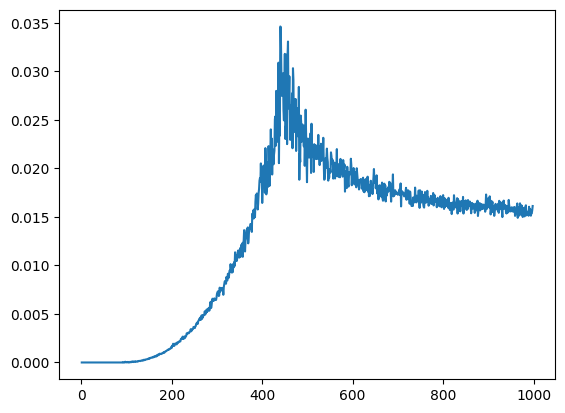

In [41]:
plt.plot(em["E_std"])

In [15]:
def error(X, k = 0.001):
    return 0.25*X*np.exp(k)

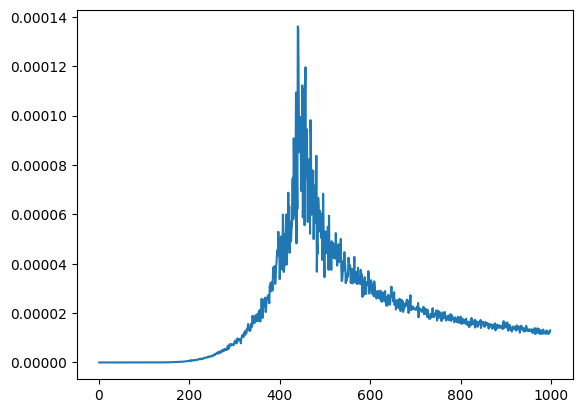

In [58]:
plt.plot(error(get_cv(em)))

In [177]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

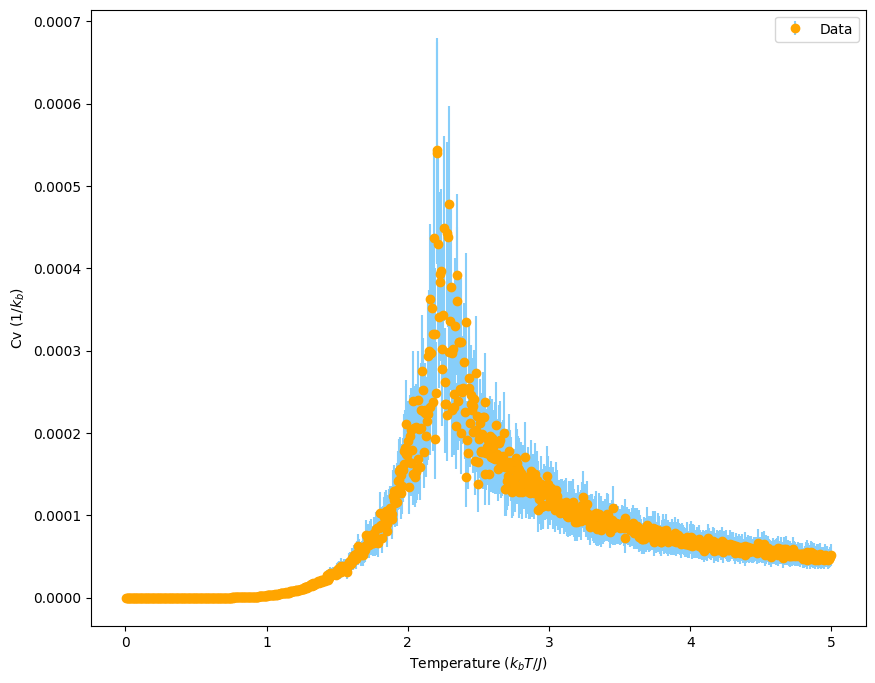

In [178]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")

plt.xlabel("Temperature ($k_bT/J$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()

In [48]:
def exponential_growth(x, k, A):
    return A*np.exp(x / k)

In [17]:
# Exponential decay function
def exponential_decay(x, k,A):
    return A*np.exp(-x / k)

In [81]:
get_cv(em)[0:index]

1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
448    0.000277
449    0.000343
450    0.000449
451    0.000235
452    0.000262
Length: 452, dtype: float64

# Finding Tc

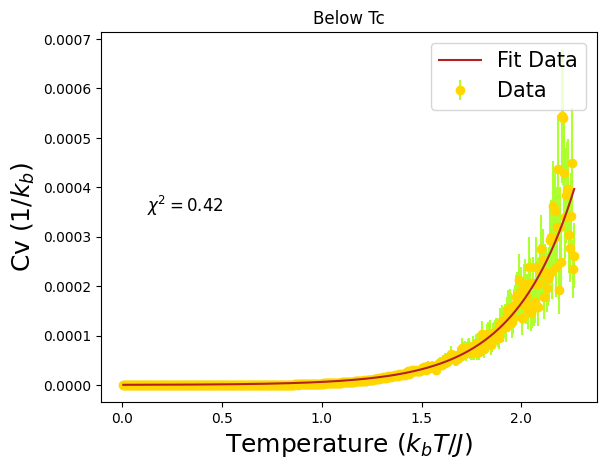

In [218]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit



popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1),absolute_sigma=True)
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data",color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][0:index], get_cv(em)[0:index], yerr = error(get_cv(em)[0:index]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
#plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
#plt.legend()


#plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
#plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
plt.text(0.1, 0.00035, r' $\chi^2=0.42$', fontsize=12)

plt.legend(prop={'size': 15})
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("Cv ($1/k_b$)", fontsize=18)
plt.title("Below Tc")
plt.show()


In [268]:
chi2 = 0
for i in range(len(em["Temp"][0:index])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_decay(em["Temp"][0:index], *popt_l))[i] - list(em["Temp"][0:index])[i])**2/((np.sqrt(list(em["Temp"][:index])[i]*np.sqrt(pcov_l[0][0])) + np.sqrt(pcov_l[1][1])))

chi2/len(em["Temp"][:index])

0.5590952428839364

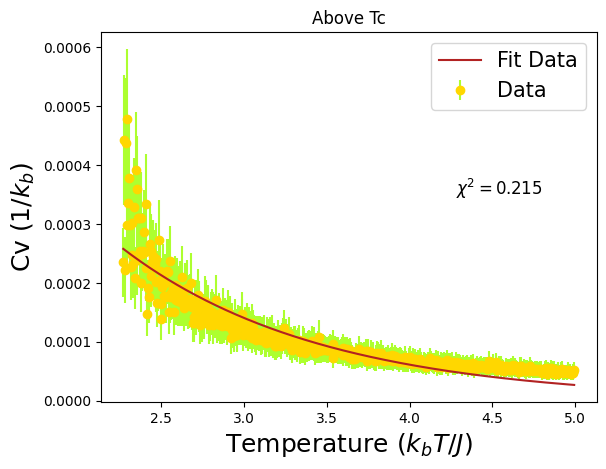

In [221]:
# Right Fit
#fig = plt.figure()
#ax = fig.add_subplot()
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1), absolute_sigma=True)
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
#plt.axis([0, 10, 0, 10])
plt.text(4.25, 0.00035, r' $\chi^2=0.215$', fontsize=12)
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("Cv ($1/k_b$)", fontsize=18)
plt.legend(prop={'size': 15})
plt.title("Above Tc")
plt.show()


In [183]:
pcov_r

array([[ 9.39180237e+05, -3.14552704e+03],
       [-3.14552704e+03,  1.09011563e+01]])

In [184]:
np.trace(np.sqrt(pcov_r))

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_20084/2545936990.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.trace(np.sqrt(pcov_r))


972.4148088483483

log(y) =  Ae^{-x/k} 

In [220]:
chi2 = 0
for i in range(len(em["Temp"][index:])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_decay(em["Temp"][index:], *popt_r))[i] - list(em["Temp"][index:])[i])**2/(np.sqrt(list(em["Temp"][index:])[i]*np.sqrt(pcov_r[0][0])) + np.sqrt(pcov_r[1][1]))

chi2/len(em["Temp"][index:])

0.21460156466422595

In [84]:
index

452

In [168]:
tc_err = np.sqrt((0.434* np.sqrt(pcov_l[1][1])/popt_l[1])**2 + (0.434* np.sqrt(pcov_r[1][1])/popt_r[1])**2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0]))**2)
tc_err

0.07835849747871614

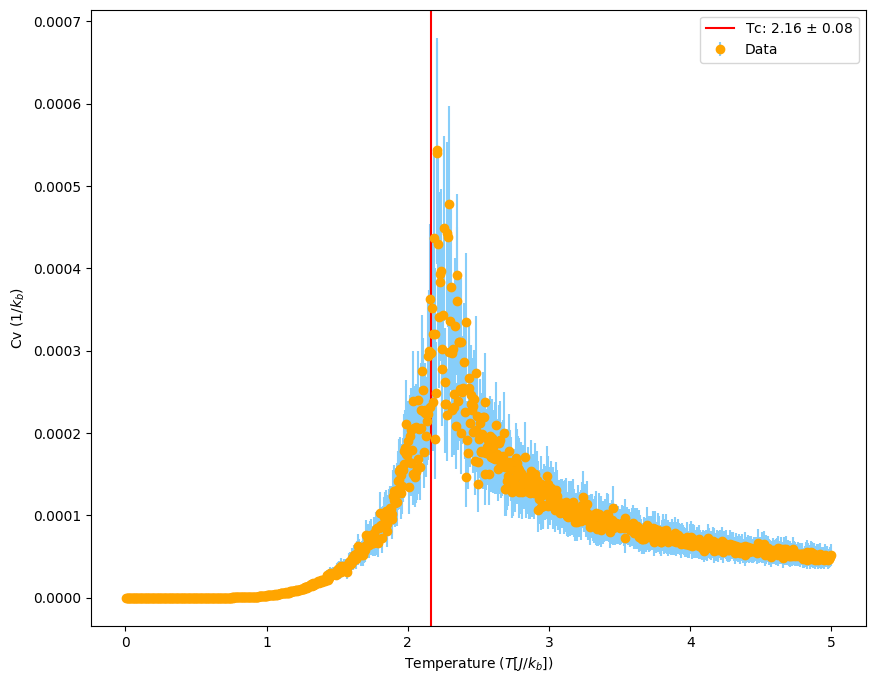

In [222]:
#Overlay Fits
# Add Tc Error! + chi squared

fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.2f} $\pm$ {1:.2f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), 0.08))
plt.legend()
plt.xlabel("Temperature ($T[J/k_b]$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()
plt.show()

In [ ]:
(- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])

0.07835849747871614

In [113]:
(2.269 - 2.162)/2.269

0.04715733803437647

## Magnetization

Text(0, 0.5, 'Aveage Site Magnetization')

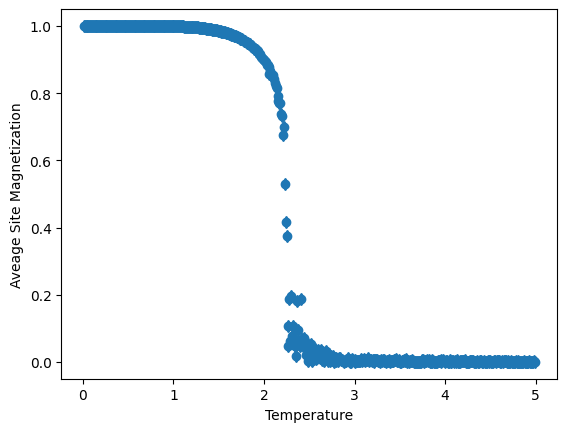

In [55]:
#plt.plot(em["Temp"], em["M_mean"])
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"], uplims=True, lolims=True,fmt='o')
plt.xlabel('Temperature')
plt.ylabel('Aveage Site Magnetization')

In [194]:
pcov_l

array([[ 2.12378117e-06, -8.59236594e-05, -3.76921562e-07],
       [-8.59236594e-05,  1.06564512e-01,  1.52494981e-05],
       [-3.76921562e-07,  1.52494981e-05,  1.60458178e-06]])

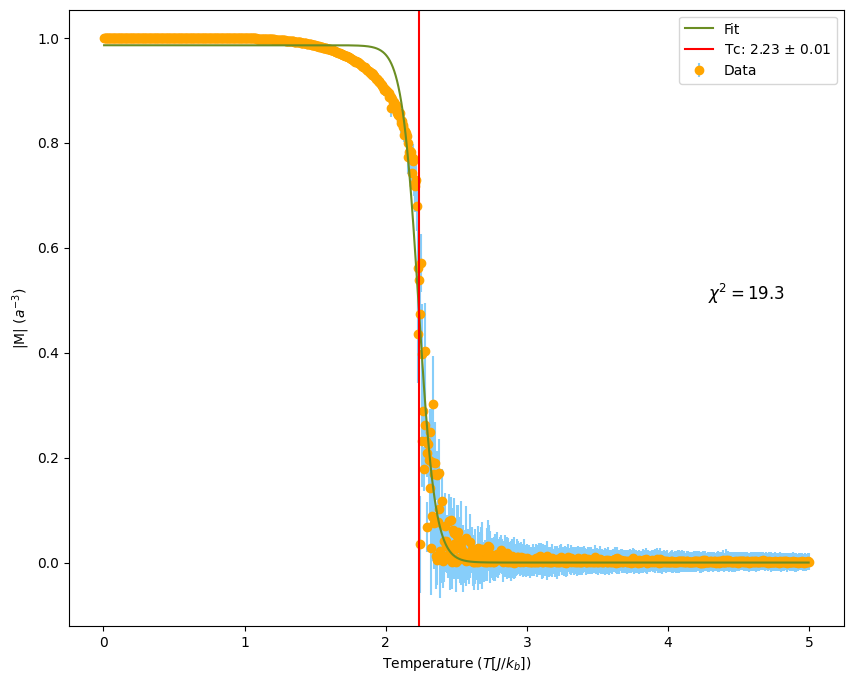

In [225]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"],fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data",zorder = -1)
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1))
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit",color= "olivedrab")
plt.axvline(popt_l[2], label = "Tc: {0:.2f} $\pm$ {1:0.2f}".format(popt_l[2], np.sqrt(pcov_l[2][2])*10,), color = "r")
#plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.2f} $\pm$ {1:.2f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), 0.08))
plt.legend()
plt.text(4.25, 0.5, r' $\chi^2=19.3$', fontsize=12)
plt.xlabel("Temperature ($T[J/k_b]$)")
plt.ylabel("|M| ($a^{-3}$)")
plt.legend()
plt.show()

In [206]:
chi2 = 0
for i in range(len(em["Temp"])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(sigmoid(em["Temp"], *popt_l))[i] - list(em["Temp"])[i])**2/((np.sqrt(list(em["Temp"])[i]*np.sqrt(pcov_l[0][0])) + np.sqrt(pcov_l[1][1]) + np.sqrt(pcov_l[2][2])))

chi2/len(em["Temp"])

19.32930931571837

In [175]:
def sigmoid(x, a, b, c):
    return  a - a / (1 + np.exp(-b * (x - c)))

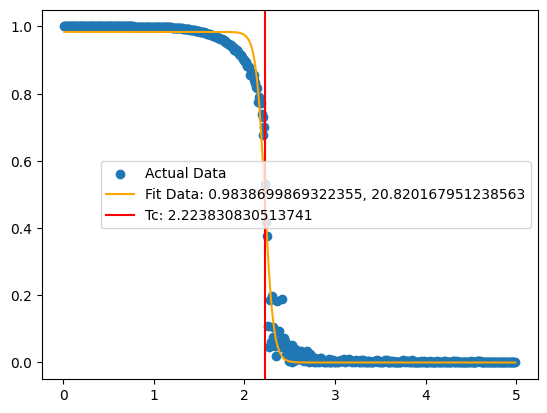

In [57]:
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1))

plt.scatter(em["Temp"], np.absolute(em["M_mean"]), label= "Actual Data")
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit Data: {}, {}".format(*popt_l), color= "orange")
plt.axvline(popt_l[2], label = "Tc: {}".format(popt_l[2]), color = "r")
plt.legend()


## Magnetic Susceptibility

$\chi = \beta Var(M)$

set $\beta = 1$

$\chi = Var(M)$

In [244]:
len(em)

998

In [227]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

Text(0.5, 1.0, 'Magnetic Susceptibility Plots')

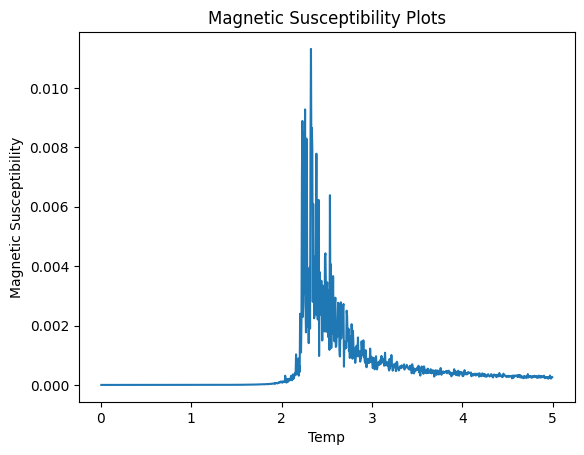

In [228]:
plt.plot(em["Temp"], get_ms(em))
plt.xlabel("Temp")
plt.ylabel("Magnetic Susceptibility")
plt.title("Magnetic Susceptibility Plots")

In [251]:
index

452

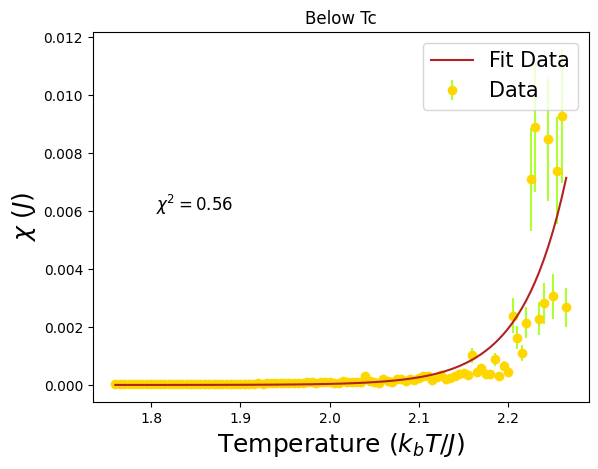

In [279]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit

min_ind = 350

popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][min_ind:index], get_ms(em)[min_ind:index], p0=(0.05, 0.00000001),absolute_sigma=True, maxfev = 4000)
plt.plot(em["Temp"][min_ind:index], exponential_growth(em["Temp"][min_ind:index], *popt_l), label= "Fit Data",color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][min_ind:index], get_ms(em)[min_ind:index], yerr = error(get_ms(em)[min_ind:index]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
#plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
#plt.legend()


#plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
#plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
plt.text(1.8, 0.006, r' $\chi^2=0.56$', fontsize=12)

plt.legend(prop={'size': 15})
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("$\chi$ ($J$)", fontsize=18)
plt.title("Below Tc")
plt.show()

In [269]:
chi2 = 0
for i in range(len(em["Temp"][0:index])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_decay(em["Temp"][0:index], *popt_l))[i] - list(em["Temp"][0:index])[i])**2/((np.sqrt(list(em["Temp"][:index])[i]*np.sqrt(pcov_l[0][0])) + np.sqrt(pcov_l[1][1])))

chi2/len(em["Temp"][:index])

0.5590952428839364

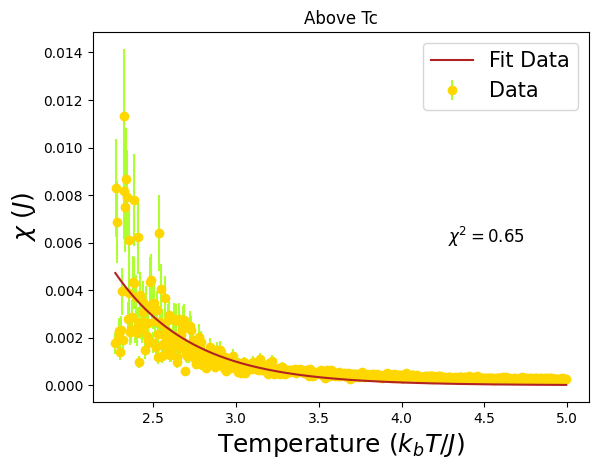

In [278]:
# Right Fit
#fig = plt.figure()
#ax = fig.add_subplot()
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1), absolute_sigma=True)
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][index:], get_ms(em)[index:], yerr = error(get_ms(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
#plt.axis([0, 10, 0, 10])
plt.text(4.25, 0.006, r' $\chi^2=0.65$', fontsize=12)
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("$\chi$ ($J$)", fontsize=18)
plt.legend(prop={'size': 15})
plt.title("Above Tc")
plt.show()

In [272]:
chi2 = 0
for i in range(len(em["Temp"][index:])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_decay(em["Temp"][index:], *popt_r))[i] - list(em["Temp"][index:])[i])**2/(np.sqrt(list(em["Temp"][index:])[i]*np.sqrt(pcov_r[0][0])) + np.sqrt(pcov_r[1][1]))

chi2/len(em["Temp"][index:])

0.06546768213580816

In [248]:
popt_l

array([1.00000000e-02, 2.03995383e-19])

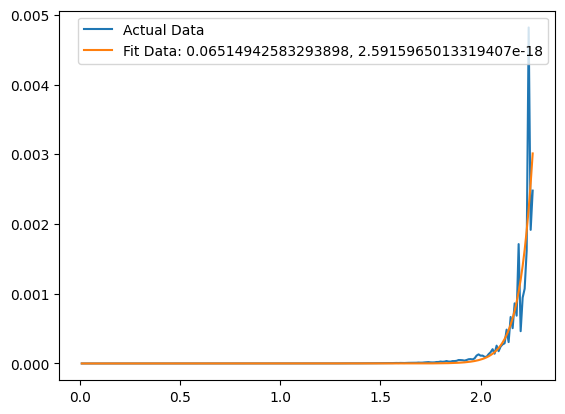

In [60]:
popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_ms(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_ms(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


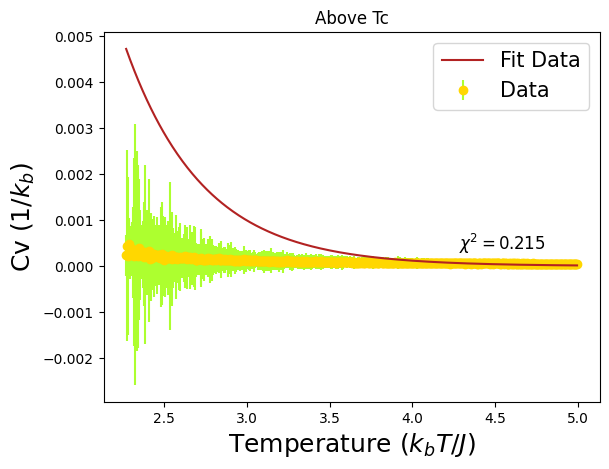

In [276]:
# Right Fit

# popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1))

# plt.plot(em["Temp"][index:], get_ms(em)[index:], label= "Actual Data")
# plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
# plt.legend()

# Right Fit
#fig = plt.figure()
#ax = fig.add_subplot()
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1), absolute_sigma=True)
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_ms(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
#plt.axis([0, 10, 0, 10])
plt.text(4.25, 0.00035, r' $\chi^2=0.215$', fontsize=12)
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("Cv ($1/k_b$)", fontsize=18)
plt.legend(prop={'size': 15})
plt.title("Above Tc")
plt.show()


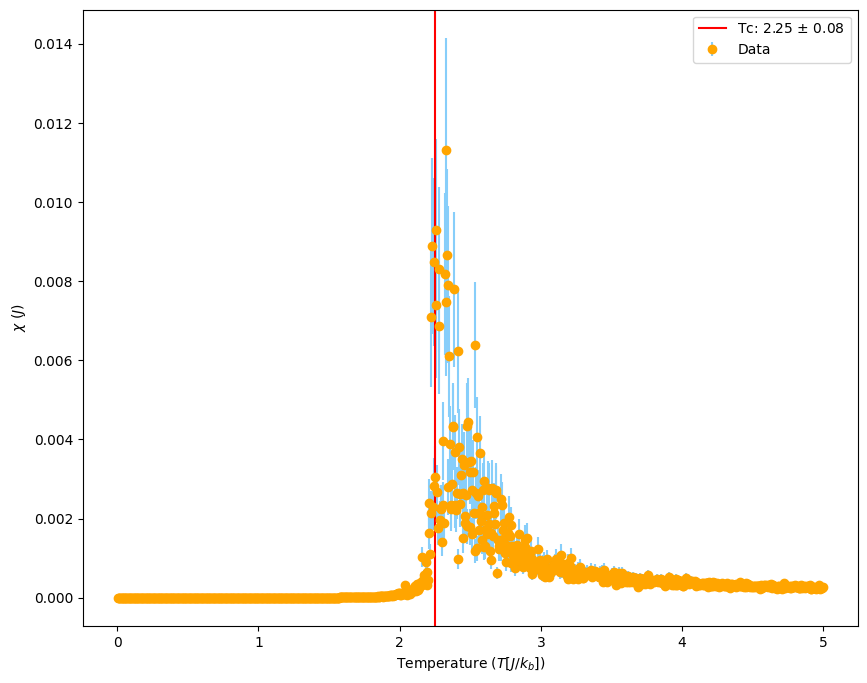

In [280]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_ms(em), yerr = error(get_ms(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.2f} $\pm$ {1:.2f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), 0.08))
plt.legend()
plt.xlabel("Temperature ($T[J/k_b]$)")
plt.ylabel("$\chi$ ($J$)")
plt.legend()
plt.show()

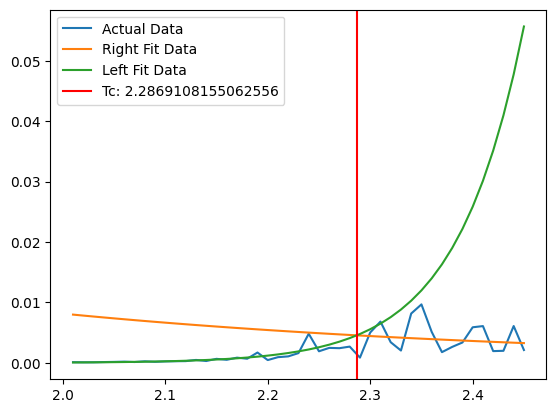

In [67]:
min_cutoff = 200
max_cutoff = 245

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_ms(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()




## Correlation Length

In [25]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob

N,n_steps,n_analyze,flip_perc
100,150000,5000,0.1

In [26]:
sc = pd.read_csv("best_large_run/0.00T5.00_SC_v0.csv", index_col = "Temp")
sc = sc.iloc[:, :-1]

In [13]:
sc.shape

(1000, 49)

In [14]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.975,0.001677,0.000258,0.000090,-0.000151,-0.000126,-0.000301,-0.000230,-0.000095,-0.000103,-0.000077,...,-0.000292,-0.000281,-0.000230,-0.000098,0.000003,-0.000132,-0.000104,-0.000117,-0.000223,-0.000112
4.980,0.001803,0.000283,-0.000119,-0.000022,-0.000098,-0.000281,-0.000291,-0.000103,-0.000210,-0.000089,...,-0.000235,-0.000143,-0.000236,-0.000105,-0.000250,-0.000162,-0.000169,-0.000139,-0.000253,-0.000181
4.985,0.001690,0.000246,0.000005,-0.000089,-0.000183,-0.000191,-0.000212,-0.000244,-0.000009,-0.000042,...,-0.000195,-0.000134,-0.000105,-0.000185,-0.000084,-0.000067,0.000082,0.000007,-0.000269,-0.000123


In [54]:


# Exponential decay function
def exponential_decay(x, k,A):
    return A*np.exp(-x / k)

In [67]:
def cor_len(data):
    T =data.shape[0]
    ind =[]
    Ks = []
    err = []
    for i in range(T):
        if not all(np.abs(v) < 10e-5 for v in data.iloc[i]):
            max_ind = np.where(data.iloc[i] <0 )[0].min()
            #print(max_ind)
            #print(data.iloc[i])
            popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(max_ind)], np.abs(data.iloc[i][:max_ind]), p0=(2.5,0.05), maxfev=20000 )
            #popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1,), maxfev=2000 )
            #print(pcov)
            if pcov[0][0] != np.inf:
                err.append(np.sqrt(pcov[0][0]))
            else:
                err.append(0.05)
            ind.append(data.index[i])
            Ks.append(popt[0])
    return ind, Ks, err





    

In [68]:
T, k,err= cor_len(sc)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33224/2286614962.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(max_ind)], np.abs(data.iloc[i][:max_ind]), p0=(2.5,0.05), maxfev=20000 )
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33224/3482854638.py:3: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)


In [92]:
T.min()

AttributeError: 'list' object has no attribute 'min'

In [81]:
len(k)

650

In [82]:
len(err)

650

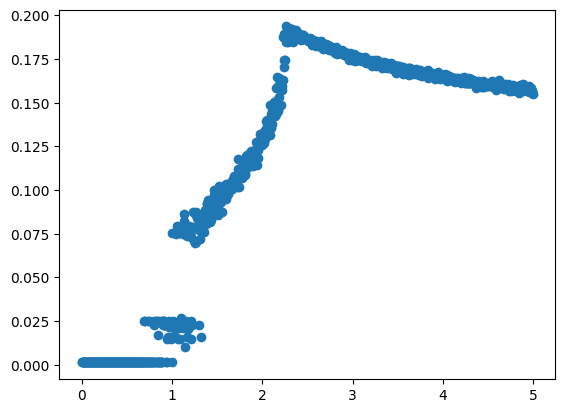

In [10]:
plt.scatter(T, k)

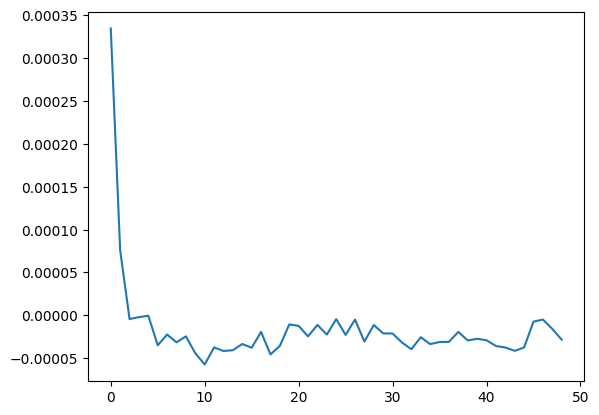

In [165]:
i = 200
plt.plot([i for i in range(sc.shape[1])], sc.iloc[i])

Text(0.5, 1.0, 'Correlation Length Plots')

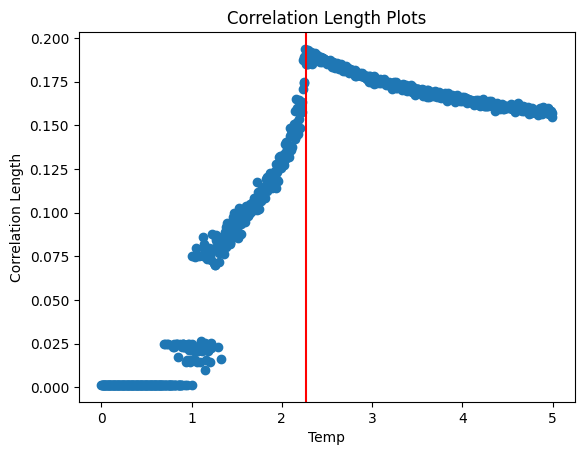

In [27]:
plt.scatter(T,k)
plt.xlabel("Temp")
plt.axvline(2.269, color = "r")
plt.ylabel("Correlation Length")
plt.title("Correlation Length Plots")

In [46]:
true_tc

2.269

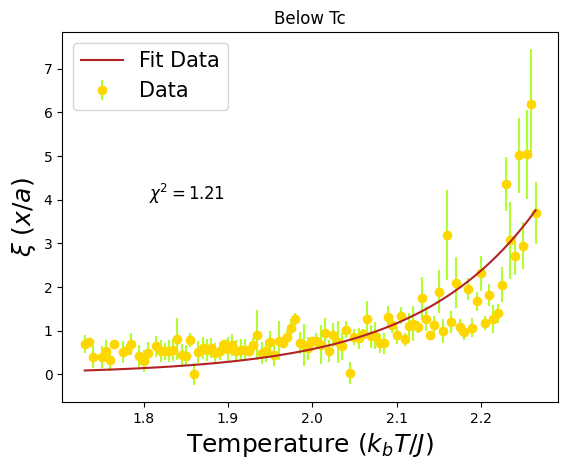

In [88]:
true_tc = 2.269

difference_array = np.absolute(np.array(T)-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit

min_ind = 0

popt_l, pcov_l = curve_fit(exponential_growth, T[min_ind:index], k[min_ind:index],absolute_sigma=True, maxfev = 4000)
plt.plot(T[min_ind:index], exponential_growth(T[min_ind:index], *popt_l), label= "Fit Data",color = "firebrick", zorder = 2)
plt.errorbar(T[min_ind:index], k[min_ind:index], yerr = 5*np.array(err[:index]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
#plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
#plt.legend()


#plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
#plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
plt.text(1.8, 4, r' $\chi^2=1.21$', fontsize=12)

plt.legend(prop={'size': 15})
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel(r"$\xi$ ($x/a$)", fontsize=18)
plt.title("Below Tc")
plt.show()

In [70]:
chi2 = 0
for i in range(len(T[:index])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_growth(T[:index], *popt_l))[i] - list(T[:index])[i])**2/(np.sqrt(list(T[:index])[i]*np.sqrt(pcov_l[0][0])) + np.sqrt(pcov_l[1][1]))

chi2/len(T[:index])

8.701352882003857

In [71]:
popt_r

array([ 1.04294456, 24.38394343])

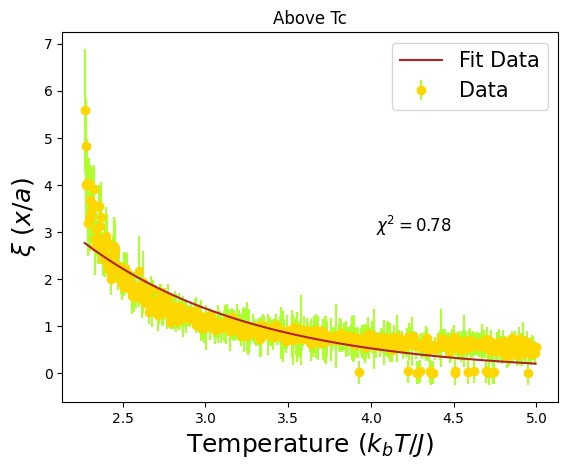

In [91]:
popt_r, pcov_r = curve_fit(exponential_decay, T[index:], k[index:],p0=(1, 0.2), absolute_sigma=True)
plt.plot(T[index:], exponential_decay(np.array(T[index:]), *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
plt.errorbar(T[index:], k[index:], yerr = 5*np.array(err[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
#plt.axis([0, 10, 0, 10])
plt.text(4, 3, r' $\chi^2=0.78$', fontsize=12)
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel(r"$\xi$ ($x/a$)", fontsize=18)
plt.legend(prop={'size': 15})
plt.title("Above Tc")
plt.show()


In [73]:
chi2 = 0
for i in range(len(T[index:])):
    #print(list(exponential_decay(em["Temp"][index:], *popt_r)))
    #print(list(em["Temp"][index:])[i])
    #print(em["Temp"][index:][i]*np.sqrt(pcov_r[0][0]) + np.sqrt(pcov_r[1][1]))
    chi2 += (list(exponential_decay(np.array(T[index:]), *popt_r))[i] - list(T[index:])[i])**2/(np.sqrt(list(T[index:])[i]*np.sqrt(pcov_r[0][0])) + np.sqrt(pcov_r[1][1]))

chi2/len(T[index:])

1.6334977771442485

In [74]:
popt_r

array([ 1.04294456, 24.38394343])

In [75]:
popt_l

array([1.40927449e-01, 3.93305553e-07])

In [76]:
tc_err = np.sqrt((0.434* np.sqrt(pcov_l[1][1])/popt_l[1])**2 + (0.434* np.sqrt(pcov_r[1][1])/popt_r[1])**2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0]))**2)
tc_err

0.972555660674945

In [ ]:
err

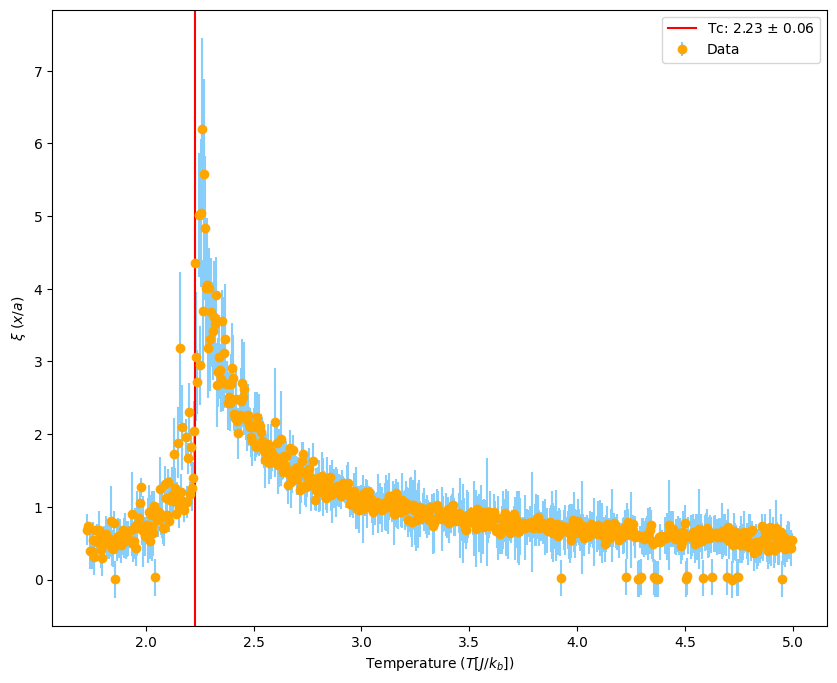

In [85]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(T, k, yerr = 5*np.array(err),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.2f} $\pm$ {1:.2f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), 0.06))
plt.legend()
plt.xlabel("Temperature ($T[J/k_b]$)")
plt.ylabel(r"$\xi$ ($x/a$)")
plt.legend()
plt.show()

In [28]:
T[np.argmax(k)]

2.259999999999988

In [29]:
popt_l, pcov_l = curve_fit(exponential_growth, sc.index[0:index], cor_len(sc)[0:index], p0=(1.0, 1))

plt.plot(sc.index[0:index], cor_len(sc)[0:index], label= "Actual Data")
plt.plot(sc.index[0:index], exponential_growth(sc.index[0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


NameError: name 'exponential_growth' is not defined

In [196]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, sc.index[index:], cor_len(sc)[index:], p0=(1.0, 1))

plt.plot(sc.index[index:], cor_len(sc)[index:], label= "Actual Data")
plt.plot(sc.index[index:], exponential_decay(sc.index[index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: `ydata` must not be empty!

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: x and y must have same first dimension, but have shapes (150,) and (2, 500)

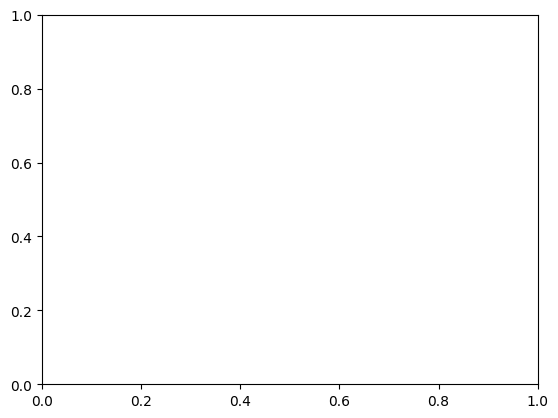

In [197]:
min_cutoff = 0
max_cutoff = 150

plt.plot(sc.index[min_cutoff:max_cutoff], cor_len(sc)[min_cutoff:max_cutoff], label= "Actual Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_decay(sc.index[min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_growth(sc.index[min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


# plt.plot(sc.index[30:90], cor_len(sc)[30:90], label= "Actual Data")
# plt.plot(sc.index[30:90], exponential_decay(sc.index[30:90], *popt_r), label= "Right Fit Data")
# plt.plot(sc.index[30:90], exponential_growth(sc.index[30:90], *popt_l), label= "Left Fit Data")
# plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
# plt.legend()